# Pytorch Primer: basics and regression

Pytorch is the leading framework for building neural networks and deep learning models. Find detailed info here: https://pytorch.org

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0'

### Tensors
Pytorch revolves around tensors. Tensors are essentially n-dimensional matrices. Let's start from scalars and build up.

In [2]:
scalar = torch.tensor(7)
print(scalar)
print(scalar.ndim)
print(scalar.item())

tensor(7)
0
7


In [3]:
# Vector
vector = torch.tensor([5, 6])
print(vector)
print(vector.ndim)
print(vector.shape)
print(vector[1])
print(vector[1].item())

tensor([5, 6])
1
torch.Size([2])
tensor(6)
6


In [4]:
# Matrix
M = torch.tensor([[7, 8], 
                       [9, 10]])
print(M)
print(M.ndim)
print(M.shape)
print(M[1])
print(M[1][0])

tensor([[ 7,  8],
        [ 9, 10]])
2
torch.Size([2, 2])
tensor([ 9, 10])
tensor(9)


In [5]:
# Tensor
T = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
print(T)
print(T.ndim)
print(T.shape)

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])
3
torch.Size([1, 3, 3])


### Creatig Tensors
Tensors can be created similarly to numpy arrays. A lot of the classic numpy creation methods work the same.

In [6]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(224, 224, 3))
print(random_tensor) 
print(random_tensor.dtype) 
print(random_tensor.dim()) 
print(random_tensor.shape)

tensor([[[0.9966, 0.3363, 0.7980],
         [0.5661, 0.7122, 0.5512],
         [0.8037, 0.6260, 0.0571],
         ...,
         [0.8179, 0.4249, 0.4615],
         [0.4066, 0.6379, 0.7715],
         [0.2255, 0.2447, 0.3777]],

        [[0.1412, 0.6118, 0.5412],
         [0.2172, 0.6168, 0.0870],
         [0.8576, 0.9916, 0.8638],
         ...,
         [0.2234, 0.0930, 0.0885],
         [0.4536, 0.8209, 0.4377],
         [0.4182, 0.7225, 0.2751]],

        [[0.1377, 0.7769, 0.6076],
         [0.6526, 0.6092, 0.8704],
         [0.9720, 0.6833, 0.7451],
         ...,
         [0.7017, 0.5791, 0.6029],
         [0.6119, 0.4898, 0.5426],
         [0.6706, 0.8968, 0.5452]],

        ...,

        [[0.9508, 0.0972, 0.7104],
         [0.5541, 0.7103, 0.9362],
         [0.6575, 0.0947, 0.8240],
         ...,
         [0.6824, 0.9095, 0.5401],
         [0.3271, 0.9906, 0.8497],
         [0.4694, 0.0236, 0.1425]],

        [[0.0508, 0.1284, 0.2260],
         [0.9373, 0.1408, 0.9125],
         [0.

In [7]:
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
print(zero_to_ten)
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
print(ten_zeros)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Aside from shape issues (tensor shapes don't match up), two of the other most common issues you'll come across in PyTorch are datatype and device issues.

For example, one of tensors is torch.float32 and the other is torch.float16 (PyTorch often likes tensors to be the same format).

Or one of your tensors is on the CPU and the other is on the GPU (PyTorch likes calculations between tensors to be on the same device).

In [8]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [9]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.shape, float_16_tensor.dtype, float_16_tensor.device

(torch.Size([3]), torch.float16, device(type='cpu'))

### Tensor operations
You can do all the classic operations of numpy arrays on tensors. 
Remember that tensors **do not work in place**

In [10]:
tensor = torch.tensor([1, 2, 3])
print(tensor + 10)
print(tensor * 10)
print(tensor)

tensor([11, 12, 13])
tensor([10, 20, 30])
tensor([1, 2, 3])


The most important operation is multiplication. Remember the basics:

The inner dimensions must match:
- (3, 2) @ (3, 2) won't work
- (2, 3) @ (3, 2) will work
- (3, 2) @ (2, 3) will work

The resulting matrix has the shape of the outer dimensions:
- (2, 3) @ (3, 2) -> (2, 2)
- (3, 2) @ (2, 3) -> (3, 3)

In [11]:
tensor = torch.tensor([1, 2, 3])

In [12]:
# Element-wise matrix multiplication
print(tensor * tensor)
# Matrix multiplication
print(torch.matmul(tensor, tensor))

tensor([1, 4, 9])
tensor(14)


In [13]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [14]:
# Use the transpose
print(tensor_A)
print(tensor_B.T)
print(torch.matmul(tensor_A, tensor_B.T)) 

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])
tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])


### Reshaping, stacking, squeezing and unsqueezing
Matrix multiplication is the most important operation for neural networks. The second most important is shape manipulation. 

In [15]:
x = torch.arange(1., 8.)
print(x, x.shape)
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
print(x_reshaped, x_reshaped.shape)
# Change view (keeps same data as original but changes view)
# torch.view() really only creates a new view of the same tensor. So changing the view changes the original tensor too.
z = x.view(1, 7)
print(z, z.shape)
z[:, 0] = 5
print(z,x,x_reshaped)

tensor([1., 2., 3., 4., 5., 6., 7.]) torch.Size([7])
tensor([[1., 2., 3., 4., 5., 6., 7.]]) torch.Size([1, 7])
tensor([[1., 2., 3., 4., 5., 6., 7.]]) torch.Size([1, 7])
tensor([[5., 2., 3., 4., 5., 6., 7.]]) tensor([5., 2., 3., 4., 5., 6., 7.]) tensor([[5., 2., 3., 4., 5., 6., 7.]])


In [16]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) 
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

In [17]:
x_stacked = torch.stack([x, x, x, x], dim=1)
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.]])

***squeezing and unsqueezing***
Notice the single dimensions in the tensors. We can remove them or add them

In [18]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [19]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


In [20]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


# Simple pytorch linear regression
We will start with simple, synthetic data with known parameters and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

In [21]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [22]:
from sklearn.model_selection import train_test_split
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print(X_train, y_train)
len(X_train), len(y_train), len(X_test), len(y_test)

tensor([[0.2400],
        [0.0800],
        [0.7400],
        [0.1600],
        [0.0600],
        [0.1200],
        [0.8200],
        [0.9200],
        [0.9400],
        [0.3000],
        [0.1800],
        [0.3200],
        [0.4800],
        [0.6800],
        [0.6200],
        [0.0000],
        [0.8800],
        [0.5400],
        [0.6600],
        [0.1000],
        [0.5800],
        [0.2200],
        [0.7200],
        [0.0200],
        [0.4200],
        [0.0400],
        [0.8600],
        [0.7000],
        [0.4600],
        [0.8000],
        [0.2000],
        [0.4400],
        [0.3600],
        [0.9800],
        [0.4000],
        [0.1400],
        [0.8400],
        [0.2800],
        [0.5600],
        [0.7600]]) tensor([[0.4680],
        [0.3560],
        [0.8180],
        [0.4120],
        [0.3420],
        [0.3840],
        [0.8740],
        [0.9440],
        [0.9580],
        [0.5100],
        [0.4260],
        [0.5240],
        [0.6360],
        [0.7760],
        [0.7340],
        [

(40, 40, 10, 10)

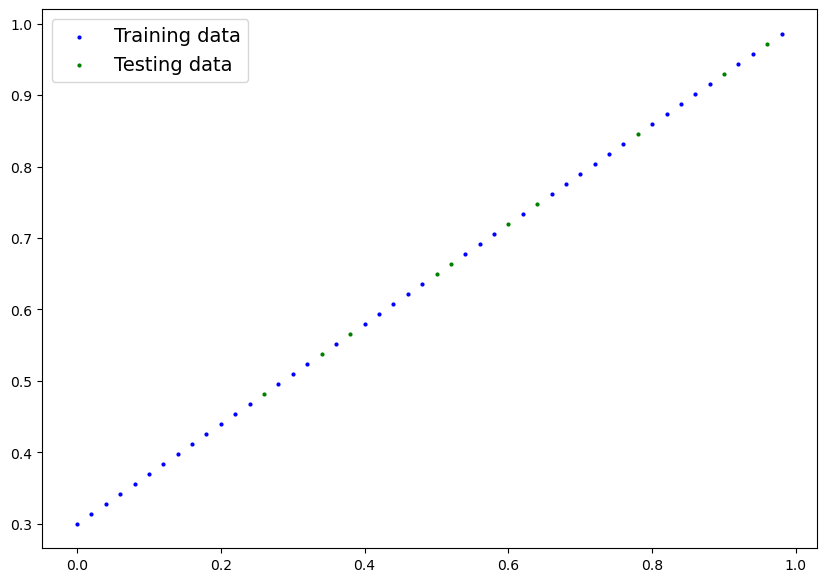

In [23]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})
plot_predictions()

### Building the model

- **`nn.Module`** contains the larger building blocks (layers)
- **`nn.Parameter`** contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
- **`forward()`** tells the larger blocks how to make calculations on inputs (tensors full of data) within  nn.Module(s)
- **`torch.optim`** contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data


Any subclass of nn. Module needs to override forward ()
(this defines the forward computation of the model)

In [24]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

The subclass **`nn.Module`** contains all the building blocks for neural networks.

The model parameters in our case are the simple **1 dimensional weights and bias**. They will be used in the model computations (these could be different layers from torch. nn, single parameters, hard-coded values or functions) 

**`requires_grad=True`** means PyTorch will track the gradients of this specific parameter for use with **torch.autograd** and gradient descent (for many
**`torch.nn modules`**, **`requires_grad=True`** is set by default)

In [25]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
print(list(model_0.parameters()))
# List named parameters 
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1288])})


Our model starts with random paramenters. We can still use it as is, it will work fine, however it will spew out random stuff. Let's see how a model works in inference.

In [26]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

In [27]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568]])


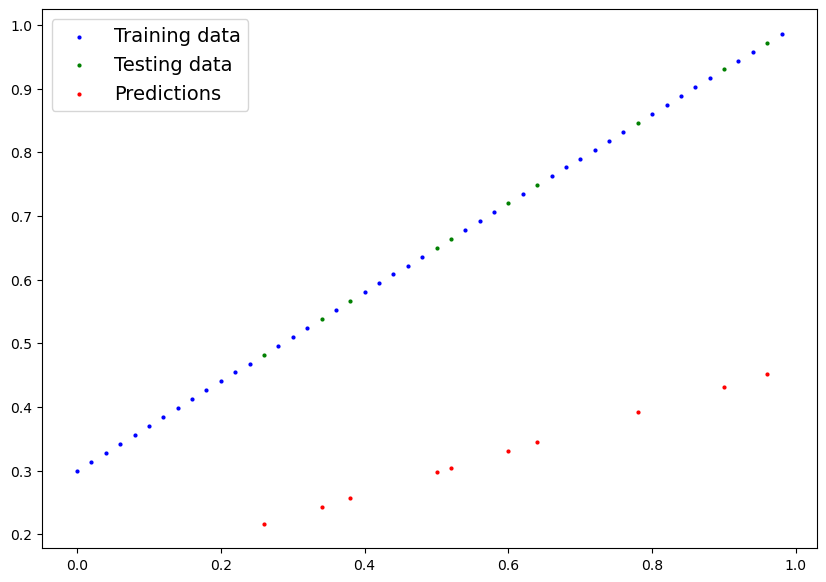

In [28]:
plot_predictions(predictions=y_preds)

To train the model we need a loss function and a way to update the parameters to lower said loss function

For our problem, since we're predicting a number, let's use MAE (which is under torch.nn.L1Loss()) in PyTorch as our loss function.

And we'll use SGD, torch.optim.SGD(params, lr) where:

- `params` is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).
- `lr` is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).

In [29]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

#### ***The Training Loop***

1) **Forward pass** - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).
2) **Calculate the loss** - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
3) **Zero gradients** - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).
4) **Perform backpropagation on the loss** - Compute the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).
5) **Step the optimizer (gradient descent)** - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

#### ***The Testing Loop***
1) **Forward pass** - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).
2) **Calculate the loss** - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
3) **Calculate evaluation metrics** - Alongisde the loss value you may want to calculate other evaluation metrics such as accuracy on the test set.

In [30]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.3403112292289734 | MAE Test Loss: 0.3720795214176178 
Epoch: 10 | MAE Train Loss: 0.21864214539527893 | MAE Test Loss: 0.24470803141593933 
Epoch: 20 | MAE Train Loss: 0.10375527292490005 | MAE Test Loss: 0.12293665111064911 
Epoch: 30 | MAE Train Loss: 0.06399796158075333 | MAE Test Loss: 0.06073010712862015 
Epoch: 40 | MAE Train Loss: 0.05161098763346672 | MAE Test Loss: 0.04132990911602974 
Epoch: 50 | MAE Train Loss: 0.04540504142642021 | MAE Test Loss: 0.03398851305246353 
Epoch: 60 | MAE Train Loss: 0.039804037660360336 | MAE Test Loss: 0.029580067843198776 
Epoch: 70 | MAE Train Loss: 0.034203045070171356 | MAE Test Loss: 0.025171661749482155 
Epoch: 80 | MAE Train Loss: 0.028602054342627525 | MAE Test Loss: 0.020763229578733444 
Epoch: 90 | MAE Train Loss: 0.02300105430185795 | MAE Test Loss: 0.016354799270629883 


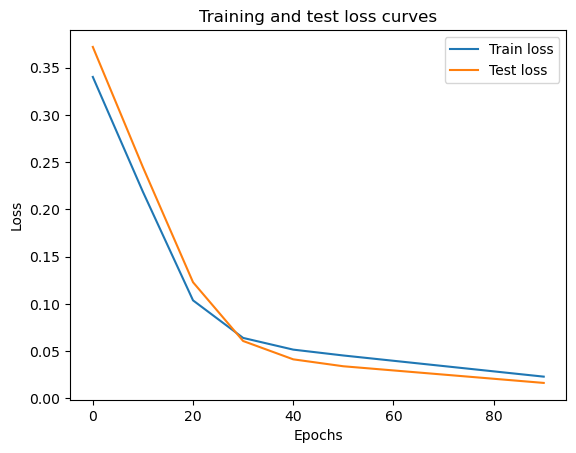

In [31]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [32]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6344]), 'bias': tensor([0.3333])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


### To evaluate the model
- Set the model in evaluation mode (model.eval()).
- Make the predictions using the inference mode context manager (with torch.inference_mode(): ...).
- All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).

In [33]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.4983],
        [0.8281],
        [0.7140],
        [0.9043],
        [0.5490],
        [0.9423],
        [0.6632],
        [0.6505],
        [0.7393],
        [0.5744]])

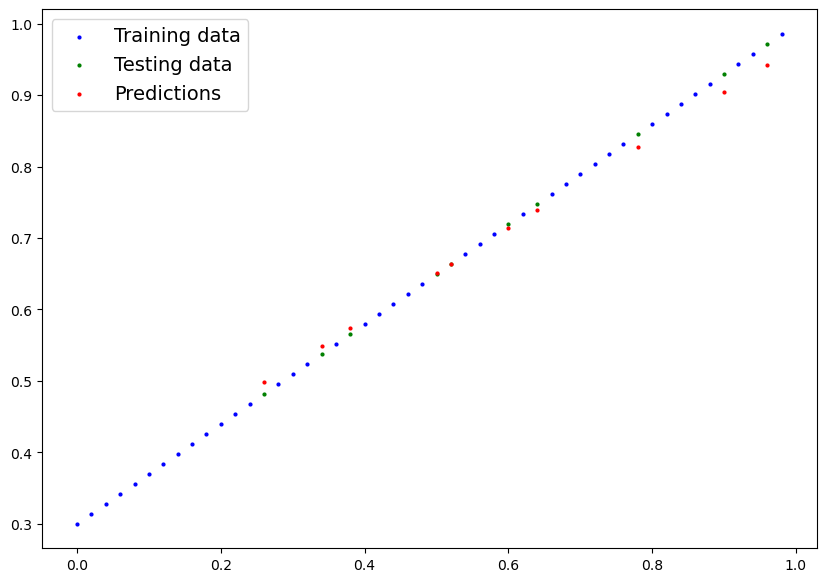

In [34]:
plot_predictions(predictions=y_preds)

In [35]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [36]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r--  1 roberto  staff  1680 May  6 09:14 models/01_pytorch_workflow_model_0.pth


In [37]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [38]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [39]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])